**üìä Synthetic Insurance Dataset based on real world statistics using Data Science Techniques**

**NAME : KEERTHI N**

**Registration no. : 2411021240024**

GITHUB REPOSITORY LINK:https://github.com/keerthi19hub/Synthetic-Insurance-Dataset-based-on-real-world-statistics-IDS-

# üìö Table of Contents
1. [Project Title and Info](#title)
2. [Project Overview](#overview)
3. [Project Goal](#goal)
4. [Challenges Faced](#challenges)
5. [Import Libraries & Load Dataset](#import)
6. [Data Preprocessing](#preprocessing)
7. [Exploratory Data Analysis (EDA)](#eda)
8. [Probability & Hypothesis Testing](#probability)
9. [Model Evaluation](#evaluation)
10. [Final Conclusion](#conclusion)


# üìä Synthetic Insurance Dataset based on real world statistics using Data Science Techniques
### üßæ Course: Introduction to Data Science  
**Semester:** 2nd Semester ‚Äì BCA  
**Project Type:** Beginner-level Data Science & Machine Learning  
**Tools Used:** Python, Pandas, Seaborn, Scikit-learn  
**Dataset:** Synthetic Insurance Dataset based on real world statistics 


## üßæ Project Overview
This project investigates a synthetic insurance dataset containing policyholder details, claim history, and premium information. Through foundational statistical analysis, we aim to:

.Understand patterns in customer risk profiles and claim behavior

.Analyze factors influencing insurance premiums and claim frequency

.Derive actionable insights using hypothesis testing, regression modeling, and categorical data analysis

## üéØ Project Goal

The main objectives of this project are:

.Examine policyholder profiles and claim behavior patterns

.Identify significant factors influencing claim occurrences and premium amounts

.Apply statistical methods to validate hypotheses and uncover hidden trends

.Generate data-driven insights to support risk assessment and pricing strategies in the insurance indust

## üöß Challenges Faced

.Missing or incomplete data in policyholder and claim records

.Class imbalance in claim status (e.g., few claims vs. many non-claims)

.Presence of outliers in variables like claim amount and premium

.Difficulty in interpreting interactions between categorical variables (e.g., region and policy type)

## üì¶ Import Libraries & Load Dataset

We begin by importing essential libraries and loading the dataset for further analysis.


**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm, ttest_ind, chi2_contingency

In [2]:
#load the dataset...
df = pd.read_csv(r"C:\Users\keert\Downloads\synthetic_insurance_data (1).csv")
df

Age  Is_Senior Marital_Status  Married_Premium_Discount Prior_Insurance  \
0      47          0        Married                        86       1-5 years   
1      37          0        Married                        86       1-5 years   
2      49          0        Married                        86       1-5 years   
3      62          1        Married                        86        >5 years   
4      36          0         Single                         0        >5 years   
...   ...        ...            ...                       ...             ...   
9995   59          1         Single                         0       1-5 years   
9996   18          0        Married                        86       1-5 years   
9997   29          0        Married                        86         <1 year   
9998   47          0         Single                         0         <1 year   
9999   49          0       Divorced                         0       1-5 years   

      Prior_Insurance_Premium_Adjustment  Claims_Frequency Claims_Severity  \
0                                     50                 0             Low   
1                                     50                 0             Low   
2                                     50                 1             Low   
3                                      0                 1             Low   
4                                      0                 2             Low   
...                                  ...               ...             ...   
9995                                  50                 0             Low   
9996                                  50                 0          Medium   
9997                                 100                 0             Low   
9998                                 100                 0          Medium   
9999                                  50                 0            High   

      Claims_Adjustment     Policy_Type  ...  Time_Since_First_Contact  \
0                     0   Full Coverage  ...                        10   
1                     0   Full Coverage  ...                        22   
2                    50   Full Coverage  ...                        28   
3                    50   Full Coverage  ...                         4   
4                   100   Full Coverage  ...                        14   
...                 ...             ...  ...                       ...   
9995                  0   Full Coverage  ...                         6   
9996                  0   Full Coverage  ...                         3   
9997                  0   Full Coverage  ...                        29   
9998                  0  Liability-Only  ...                         8   
9999                  0  Liability-Only  ...                        11   

      Conversion_Status  Website_Visits  Inquiries  Quotes_Requested  \
0                     0               5          1                 2   
1                     0               5          1                 2   
2                     0               4          4                 1   
3                     1               6          2                 2   
4                     1               8          4                 2   
...                 ...             ...        ...               ...   
9995                  1               4          3                 2   
9996                  1               6          1                 3   
9997                  1               3          4                 3   
9998                  1               2          4                 1   
9999                  1               5          0                 2   

      Time_to_Conversion Credit_Score  Premium_Adjustment_Credit    Region  \
0                     99          704                        -50  Suburban   
1                     99          726                        -50     Urban   
2                     99          772                        -50     Urban   
3                      2      

In [3]:
df.head()

Age  Is_Senior Marital_Status  Married_Premium_Discount Prior_Insurance  \
0   47          0        Married                        86       1-5 years   
1   37          0        Married                        86       1-5 years   
2   49          0        Married                        86       1-5 years   
3   62          1        Married                        86        >5 years   
4   36          0         Single                         0        >5 years   

   Prior_Insurance_Premium_Adjustment  Claims_Frequency Claims_Severity  \
0                                  50                 0             Low   
1                                  50                 0             Low   
2                                  50                 1             Low   
3                                   0                 1             Low   
4                                   0                 2             Low   

   Claims_Adjustment    Policy_Type  ...  Time_Since_First_Contact  \
0                  0  Full Coverage  ...                        10   
1                  0  Full Coverage  ...                        22   
2                 50  Full Coverage  ...                        28   
3                 50  Full Coverage  ...                         4   
4                100  Full Coverage  ...                        14   

   Conversion_Status  Website_Visits  Inquiries  Quotes_Requested  \
0                  0               5          1                 2   
1                  0               5          1                 2   
2                  0               4          4                 1   
3                  1               6          2                 2   
4                  1               8          4                 2   

   Time_to_Conversion Credit_Score  Premium_Adjustment_Credit    Region  \
0                  99          704                        -50  Suburban   
1                  99          726                        -50     Urban   
2                  99          772                        -50     Urban   
3                   2          809                        -50     Urban   
4                  10          662                         50  Suburban   

   Premium_Adjustment_Region  
0                         50  
1                        100  
2                        100  
3                        100  
4                         50  

[5 rows x 27 columns]

In [4]:
#Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

In [5]:
# üìå  Basic Info & Data Overview
print("Shape of the dataset:", df.shape)

Shape of the dataset: (10000, 27)


In [6]:
# Statistical Summary of the data
df.describe(include="all")

Age     Is_Senior Marital_Status  Married_Premium_Discount  \
count   10000.000000  10000.000000          10000              10000.000000   
unique           NaN           NaN              4                       NaN   
top              NaN           NaN        Married                       NaN   
freq             NaN           NaN           4899                       NaN   
mean       39.991700      0.159300            NaN                 42.131400   
std        14.050358      0.365974            NaN                 42.993376   
min        18.000000      0.000000            NaN                  0.000000   
25%        29.000000      0.000000            NaN                  0.000000   
50%        39.000000      0.000000            NaN                  0.000000   
75%        50.000000      0.000000            NaN                 86.000000   
max        90.000000      1.000000            NaN                 86.000000   

       Prior_Insurance  Prior_Insurance_Premium_Adjustment  Claims_Frequency  \
count            10000                        10000.000000      10000.000000   
unique               3                                 NaN               NaN   
top          1-5 years                                 NaN               NaN   
freq              5257                                 NaN               NaN   
mean               NaN                           47.625000          0.497200   
std                NaN                           34.354438          0.716131   
min                NaN                            0.000000          0.000000   
25%                NaN                            0.000000          0.000000   
50%                NaN                           50.000000          0.000000   
75%                NaN                           50.000000          1.000000   
max                NaN                          100.000000          5.000000   

       Claims_Severity  Claims_Adjustment    Policy_Type  ...  \
count            10000       10000.000000          10000  ...   
unique               3                NaN              2  ...   
top                Low                NaN  Full Coverage  ...   
freq              7003                NaN           6007  ...   
mean               NaN          36.780000            NaN  ...   
std                NaN          65.910288            NaN  ...   
min                NaN           0.000000            NaN  ...   
25%                NaN           0.000000            NaN  ...   
50%                NaN           0.000000            NaN  ...   
75%                NaN          50.000000            NaN  ...   
max                NaN         800.000000            NaN  ...   

        Time_Since_First_Contact  Conversion_Status  Website_Visits  \
count               10000.000000       10000.000000    10000.000000   
unique                       NaN                NaN             NaN   
top                          NaN                NaN             NaN   
freq                         NaN                NaN             NaN   
mean                   15.478000           0.576700        5.022900   
std                     8.677975           0.494107        2.238231   
min                     1.000000           0.000000        0.000000   
25%                     8.000000           0.000000        3.000000   
50%                    16.000000           1.000000        5.000000   
75%                    23.000000           1.000000        6.000000   
max                    30.000000           1.000000       16.000000   

           Inquiries  Quotes_Requested  Time_to_Conversion  Credit_Score  \
count   10000.000000      10000.000000         10000.00000  10000.000000   
unique           NaN               NaN                 NaN           NaN   
top              NaN               NaN                 NaN           NaN   
freq             NaN               NaN                 NaN           NaN   
mean        1.996900          1.996900            46.07320    714.253400   
std         1.415

## üßπ Data Preprocessing

In this step, we:
- Handle missing values
- Remove duplicates
- convert inconsistent datatypes
- drop columns and rows

In [9]:
#checking the missing value
df.isnull().sum()

Age                                   0
Is_Senior                             0
Marital_Status                        0
Married_Premium_Discount              0
Prior_Insurance                       0
Prior_Insurance_Premium_Adjustment    0
Claims_Frequency                      0
Claims_Severity                       0
Claims_Adjustment                     0
Policy_Type                           0
Policy_Adjustment                     0
Premium_Amount                        0
Safe_Driver_Discount                  0
Multi_Policy_Discount                 0
Bundling_Discount                     0
Total_Discounts                       0
Source_of_Lead                        0
Time_Since_First_Contact              0
Conversion_Status                     0
Website_Visits                        0
Inquiries                             0
Quotes_Requested                      0
Time_to_Conversion                    0
Credit_Score                          0
Premium_Adjustment_Credit             0


In [16]:
# Filling or removing missing values (if any)
df.dropna(inplace=True)

In [18]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [20]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [22]:
#  Data Preparation
# Convert date columns if any
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [24]:
# . Data Preparation
# Convert date columns if any
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [26]:
# Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [28]:
#  Descriptive Statistics
df.describe()

Age     Is_Senior  Married_Premium_Discount  \
count  10000.000000  10000.000000              10000.000000   
mean      39.991700      0.159300                 42.131400   
std       14.050358      0.365974                 42.993376   
min       18.000000      0.000000                  0.000000   
25%       29.000000      0.000000                  0.000000   
50%       39.000000      0.000000                  0.000000   
75%       50.000000      0.000000                 86.000000   
max       90.000000      1.000000                 86.000000   

       Prior_Insurance_Premium_Adjustment  Claims_Frequency  \
count                        10000.000000      10000.000000   
mean                            47.625000          0.497200   
std                             34.354438          0.716131   
min                              0.000000          0.000000   
25%                              0.000000          0.000000   
50%                             50.000000          0.000000   
75%                             50.000000          1.000000   
max                            100.000000          5.000000   

       Claims_Adjustment  Policy_Adjustment  Premium_Amount  \
count       10000.000000       10000.000000    10000.000000   
mean           36.780000         -79.860000     2219.571400   
std            65.910288          97.955806      148.521132   
min             0.000000        -200.000000     1800.000000   
25%             0.000000        -200.000000     2100.000000   
50%             0.000000           0.000000     2236.000000   
75%            50.000000           0.000000     2336.000000   
max           800.000000           0.000000     2936.000000   

       Safe_Driver_Discount  Multi_Policy_Discount  ...  Total_Discounts  \
count          10000.000000           10000.000000  ...     10000.000000   
mean               0.199900               0.305100  ...        30.110000   
std                0.399945               0.460473  ...        33.689782   
min                0.000000               0.000000  ...         0.000000   
25%                0.000000               0.000000  ...         0.000000   
50%                0.000000               0.000000  ...        50.000000   
75%                0.000000               1.000000  ...        50.000000   
max                1.000000               1.000000  ...       150.000000   

       Time_Since_First_Contact  Conversion_Status  Website_Visits  \
count              10000.000000       10000.000000    10000.000000   
mean                  15.478000           0.576700        5.022900   
std                    8.677975           0.494107        2.238231   
min                    1.000000           0.000000        0.000000   
25%                    8.000000           0.000000        3.000000   
50%                   16.000000           1.000000        5.000000   
75%                   23.000000           1.000000        6.000000   
max                   30.000000           1.000000       16.000000   

          Inquiries  Quotes_Requested  Time_to_Conversion  Credit_Score  \
count  10000.000000      10000.000000         10000.00000  10000.000000   
mean       1.996900          1.996900            46.07320    714.253400   
std        1.415588          0.817409            45.44845     49.749487   
min        0.000000          1.000000             1.00000    530.000000   
25%        1.000000          1.000000             6.00000    681.000000   
50%        2.000000          2.000000            12.00000    715.000000   
75%        3.000000          3.000000            99.00000    748.000000   
max        9.000000          3.000000            99.00000    850.000000   

       Premium_Adjustment_Credit  Premium_Adjustment_Region  
count               10000.000000               10000.000000  
mean                  -11.320000                  64.325000  
std                    48.704156                  39.232618  
min                   -50.000000                   0.000000  
25%       

In [30]:
df.shape

(10000, 27)

In [32]:
#total items per category 
category_counts= df["Marital_Status"].value_counts()
category_counts

Marital_Status
Married     4899
Single      3259
Widowed      922
Divorced     920
Name: count, dtype: int64

In [34]:
df.columns

Index(['Age', 'Is_Senior', 'Marital_Status', 'Married_Premium_Discount',
       'Prior_Insurance', 'Prior_Insurance_Premium_Adjustment',
       'Claims_Frequency', 'Claims_Severity', 'Claims_Adjustment',
       'Policy_Type', 'Policy_Adjustment', 'Premium_Amount',
       'Safe_Driver_Discount', 'Multi_Policy_Discount', 'Bundling_Discount',
       'Total_Discounts', 'Source_of_Lead', 'Time_Since_First_Contact',
       'Conversion_Status', 'Website_Visits', 'Inquiries', 'Quotes_Requested',
       'Time_to_Conversion', 'Credit_Score', 'Premium_Adjustment_Credit',
       'Region', 'Premium_Adjustment_Region'],
      dtype='object')

In [36]:
# Handle Missing Values (drop or fill)
df.fillna(df.mean(numeric_only=True), inplace=True)

## üìä Exploratory Data Analysis (EDA)

We explored the data using:
- Summary statistics
- Pairplots (for relationships between numerical variables)
- Heatmaps (for correlation analysis)


In [39]:
df.describe().T

count       mean         std     min  \
Age                                 10000.0    39.9917   14.050358    18.0   
Is_Senior                           10000.0     0.1593    0.365974     0.0   
Married_Premium_Discount            10000.0    42.1314   42.993376     0.0   
Prior_Insurance_Premium_Adjustment  10000.0    47.6250   34.354438     0.0   
Claims_Frequency                    10000.0     0.4972    0.716131     0.0   
Claims_Adjustment                   10000.0    36.7800   65.910288     0.0   
Policy_Adjustment                   10000.0   -79.8600   97.955806  -200.0   
Premium_Amount                      10000.0  2219.5714  148.521132  1800.0   
Safe_Driver_Discount                10000.0     0.1999    0.399945     0.0   
Multi_Policy_Discount               10000.0     0.3051    0.460473     0.0   
Bundling_Discount                   10000.0     0.0972    0.296245     0.0   
Total_Discounts                     10000.0    30.1100   33.689782     0.0   
Time_Since_First_Contact            10000.0    15.4780    8.677975     1.0   
Conversion_Status                   10000.0     0.5767    0.494107     0.0   
Website_Visits                      10000.0     5.0229    2.238231     0.0   
Inquiries                           10000.0     1.9969    1.415588     0.0   
Quotes_Requested                    10000.0     1.9969    0.817409     1.0   
Time_to_Conversion                  10000.0    46.0732   45.448450     1.0   
Credit_Score                        10000.0   714.2534   49.749487   530.0   
Premium_Adjustment_Credit           10000.0   -11.3200   48.704156   -50.0   
Premium_Adjustment_Region           10000.0    64.3250   39.232618     0.0   

                                       25%     50%     75%     max  
Age                                   29.0    39.0    50.0    90.0  
Is_Senior                              0.0     0.0     0.0     1.0  
Married_Premium_Discount               0.0     0.0    86.0    86.0  
Prior_Insurance_Premium_Adjustment     0.0    50.0    50.0   100.0  
Claims_Frequency                       0.0     0.0     1.0     5.0  
Claims_Adjustment                      0.0     0.0    50.0   800.0  
Policy_Adjustment                   -200.0     0.0     0.0     0.0  
Premium_Amount                      2100.0  2236.0  2336.0  2936.0  
Safe_Driver_Discount                   0.0     0.0     0.0     1.0  
Multi_Policy_Discount                  0.0     0.0     1.0     1.0  
Bundling_Discount                      0.0     0.0     0.0     1.0  
Total_Discounts                        0.0    50.0    50.0   150.0  
Time_Since_First_Contact               8.0    16.0    23.0    30.0  
Conversion_Status                      0.0     1.0     1.0     1.0  
Website_Visits                         3.0     5.0     6.0    16.0  
Inquiries                              1.0     2.0     3.0     9.0  
Quotes_Requested                       1.0     2.0     3.0     3.0  
Time_to_Conversion                     6.0    12.0    99.0    99.0  
Credit_Score                         681.0   715.0   748.0   850.0  
Premium_Adjustment_Credit            -50.0   -50.0    50.0    50.0  
Premium_Adjustment_Region             50.0    50.0   100.0   100.0

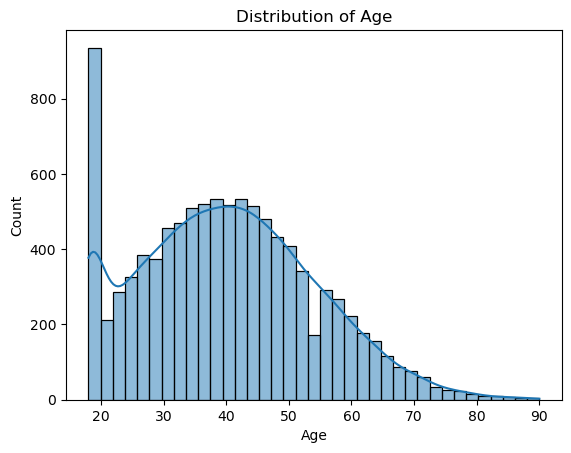

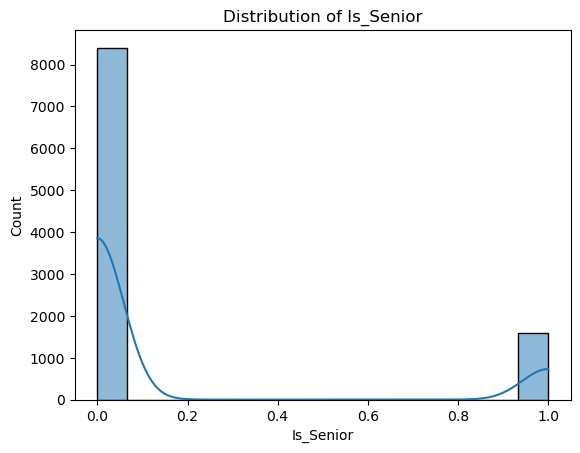

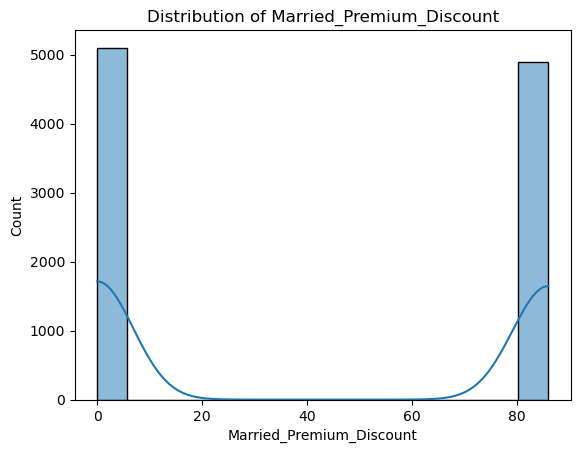

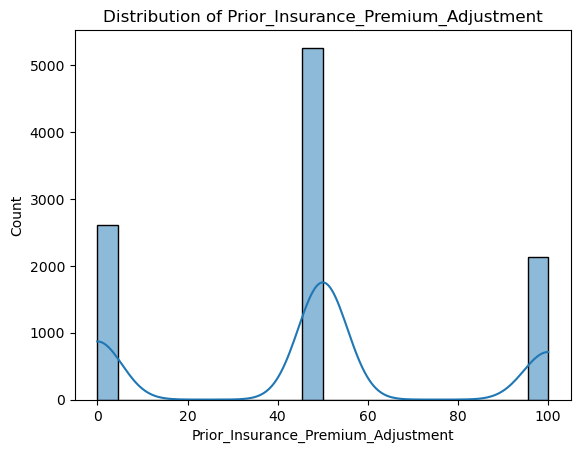

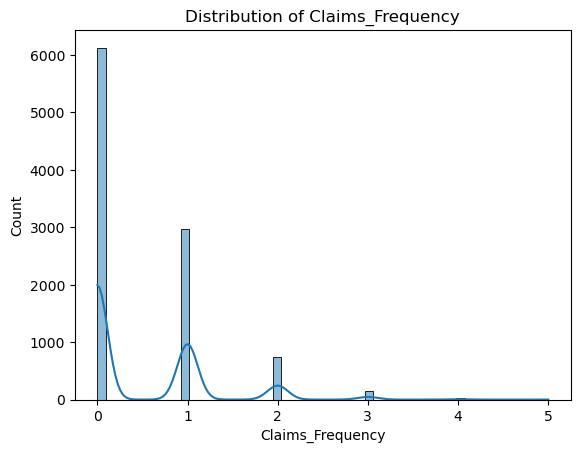

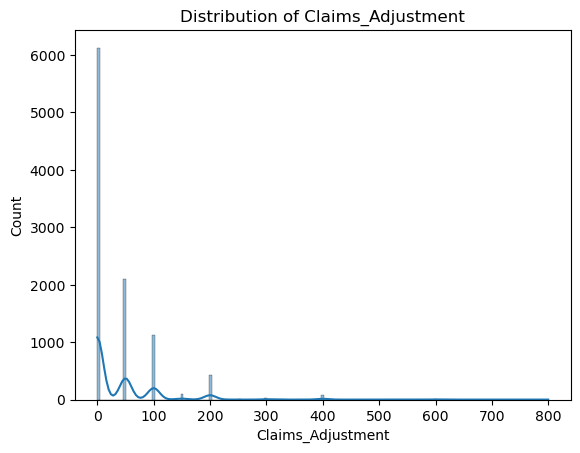

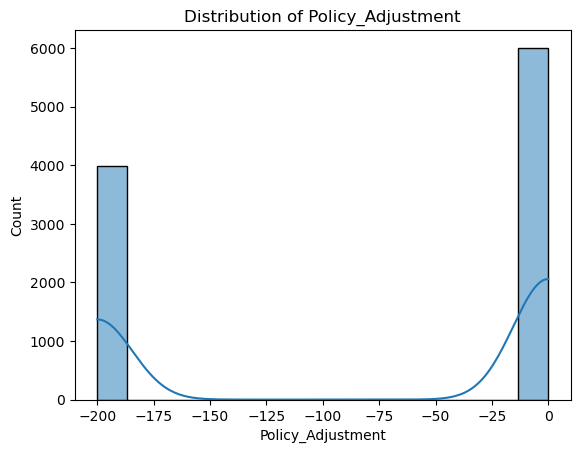

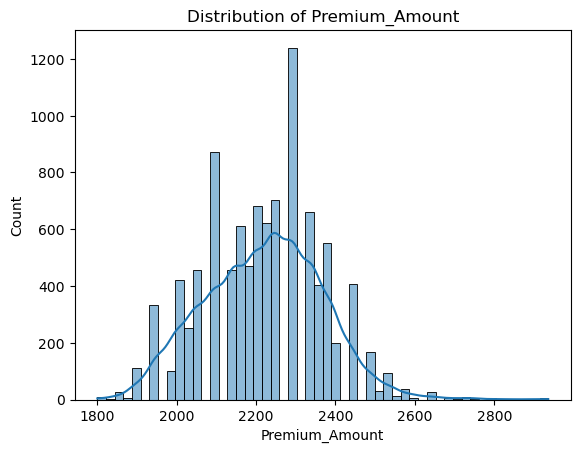

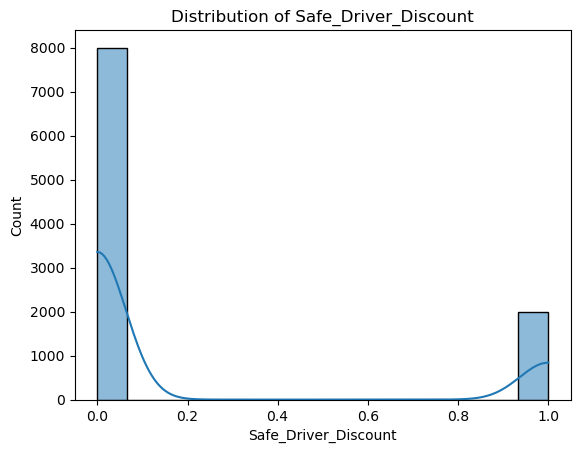

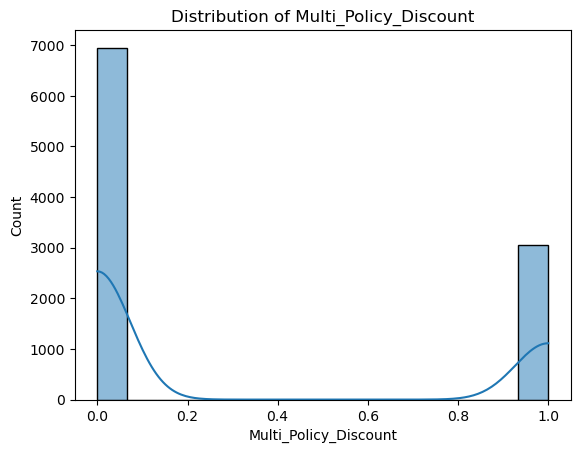

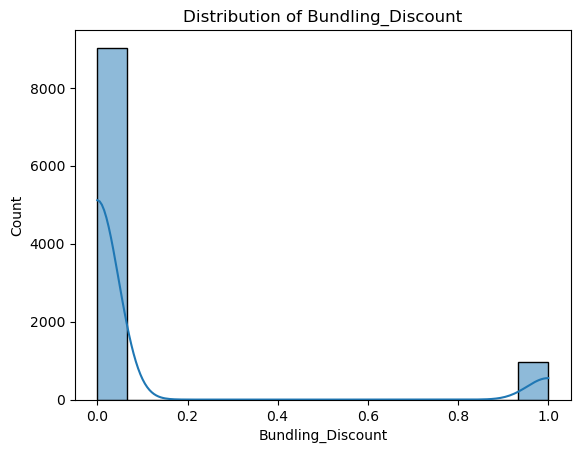

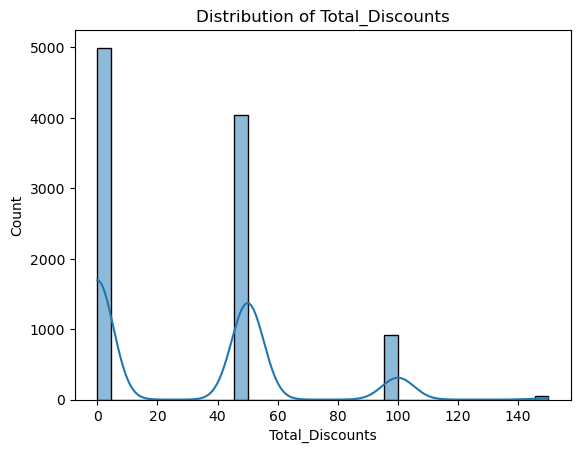

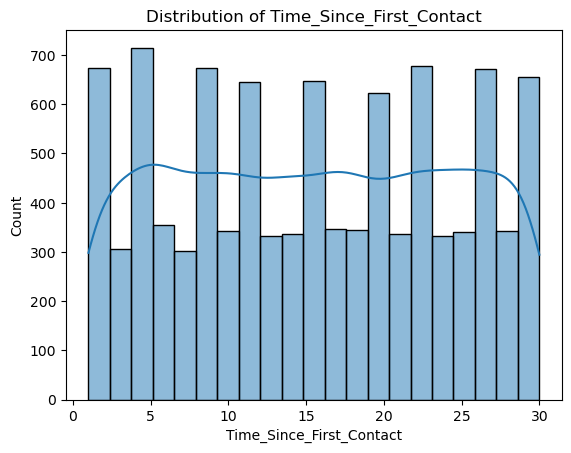

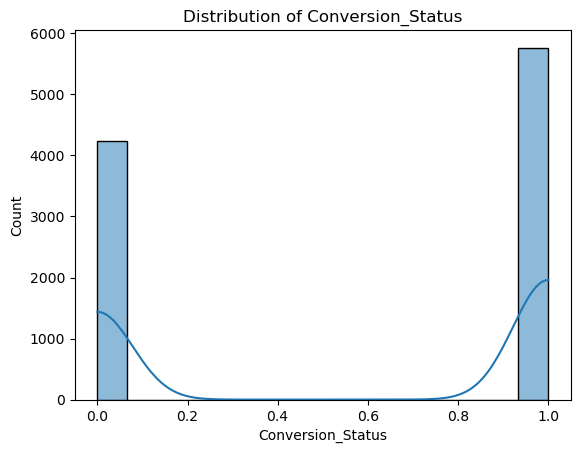

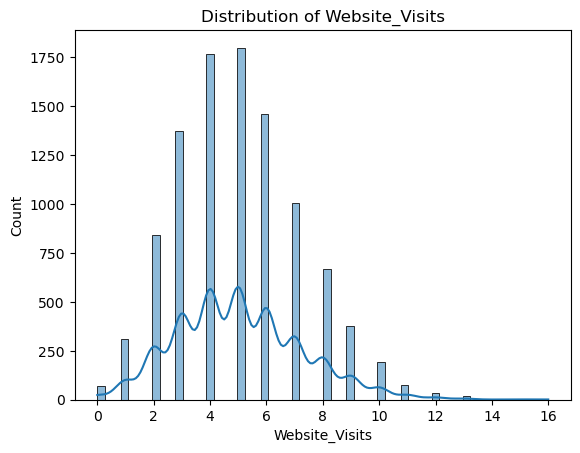

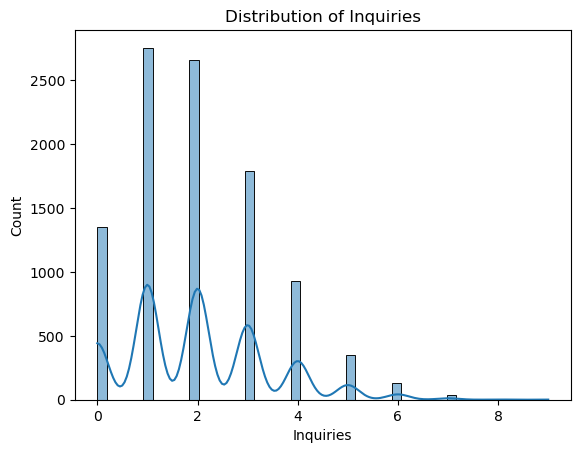

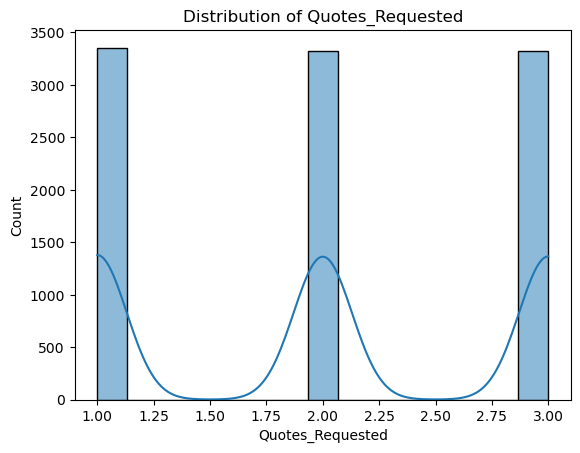

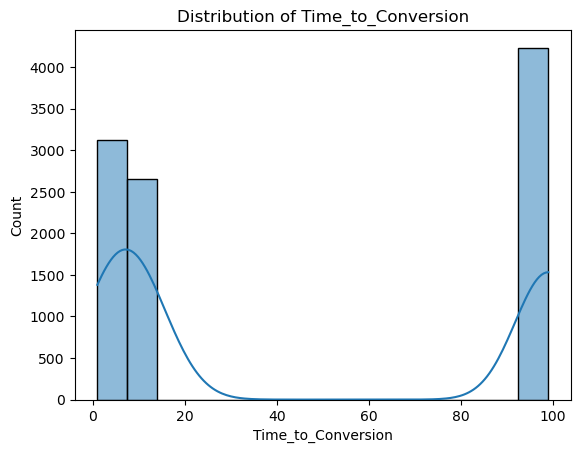

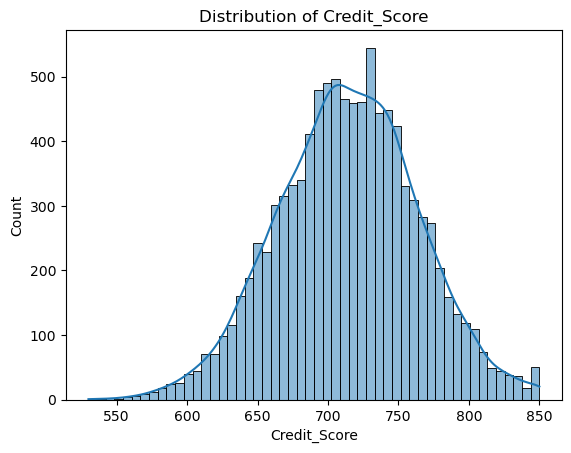

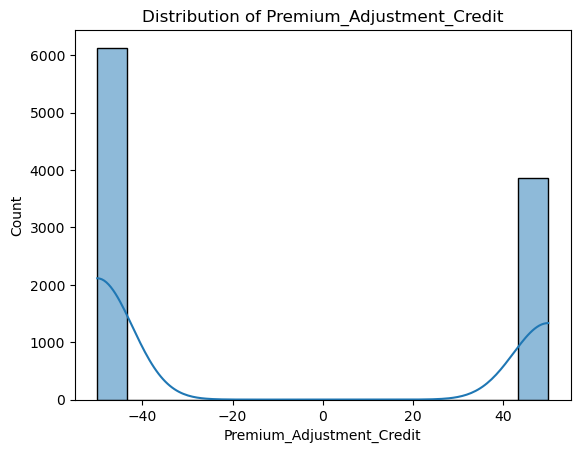

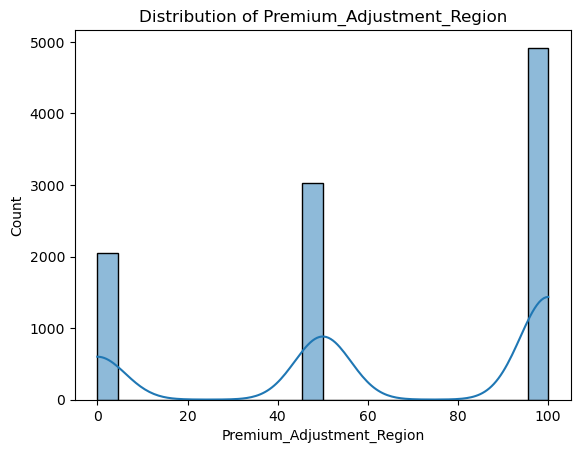

In [41]:
# Exploratory Data Analysis (EDA)

# Plotting distributions of numerical column
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

<Figure size 2000x600 with 0 Axes>

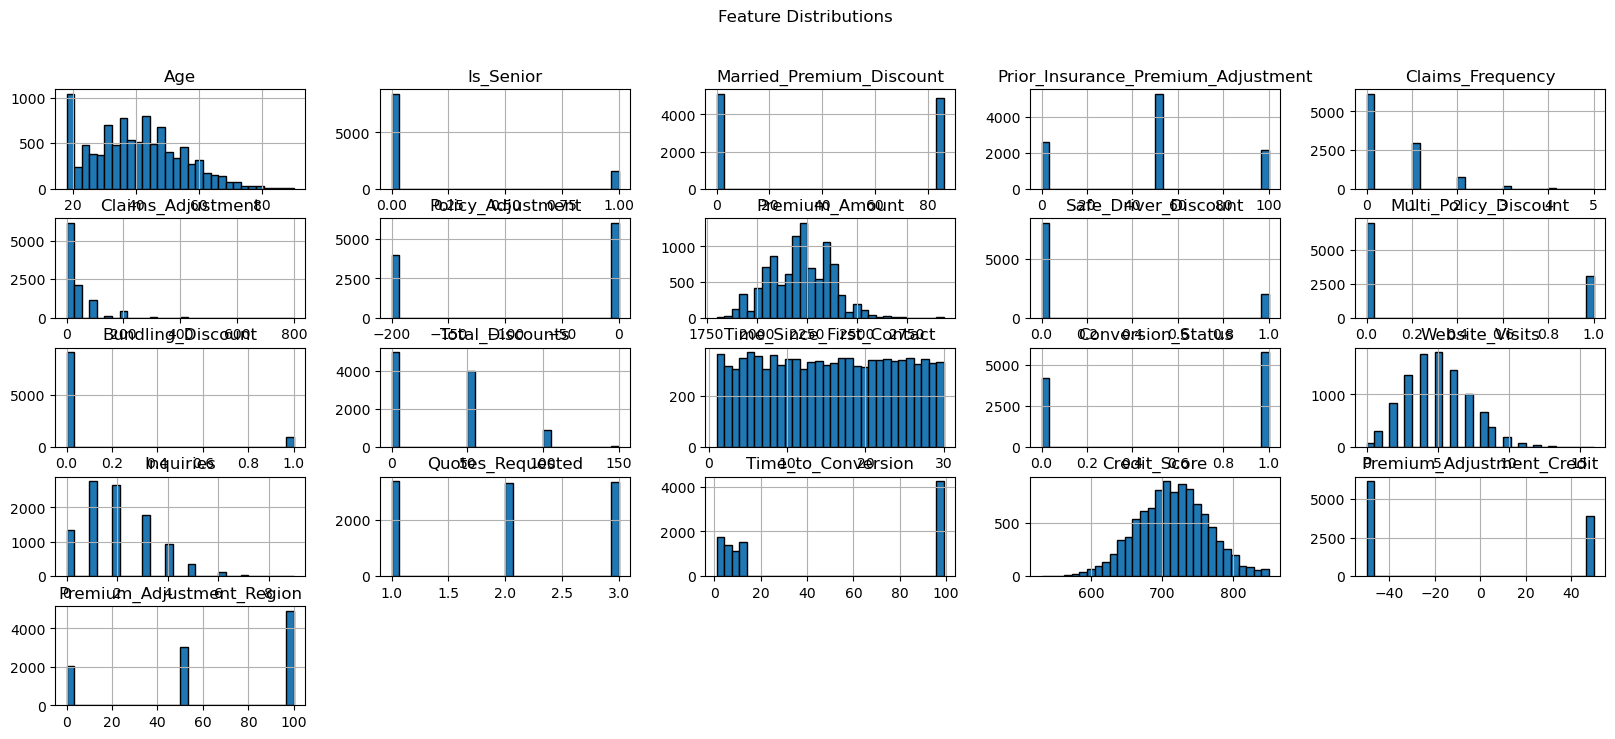

In [42]:
#EDA:Visualizing Data Distributions
plt.figure(figsize=(20,6))
df.hist(bins=30,figsize=(20,8),edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

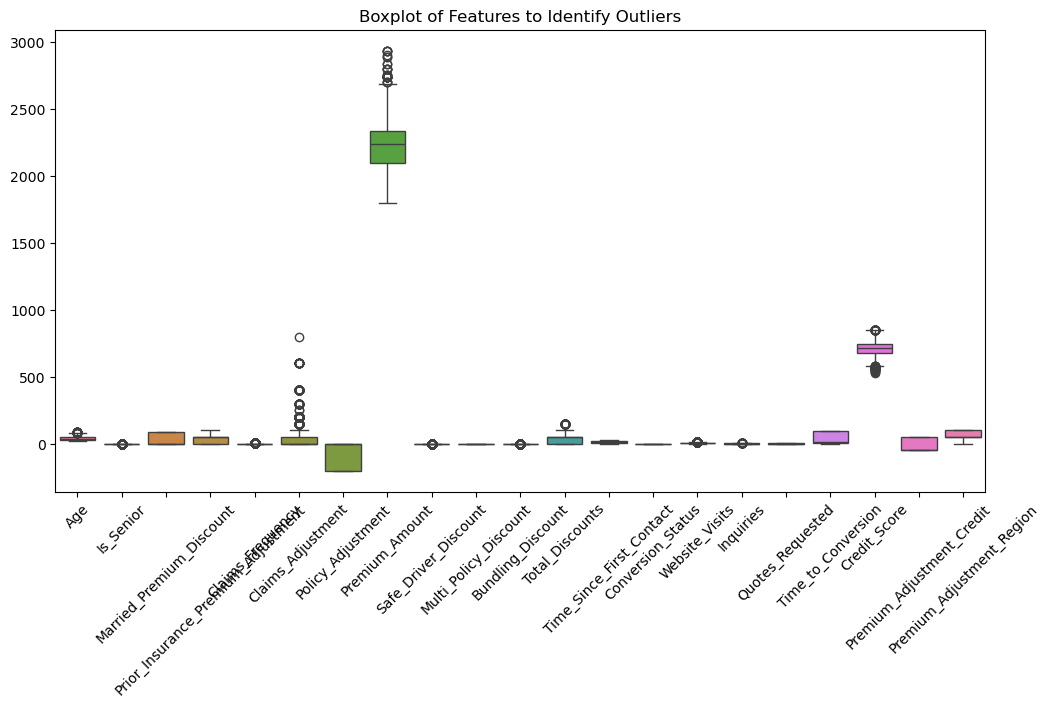

In [43]:
#finding outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of Features to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

In [44]:
Q1 = df['Credit_Score'].quantile(0.25)
Q3 = df['Credit_Score'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers
outliers = df[(df['Credit_Score'] < lower_bound) | (df['Credit_Score'] > upper_bound)]

In [45]:
Q1 = df['Claims_Adjustment'].quantile(0.25)
Q3 = df['Claims_Adjustment'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers
outliersDF = df[(df['Claims_Adjustment'] < lower_bound) | (df['Claims_Adjustment'] > upper_bound)]

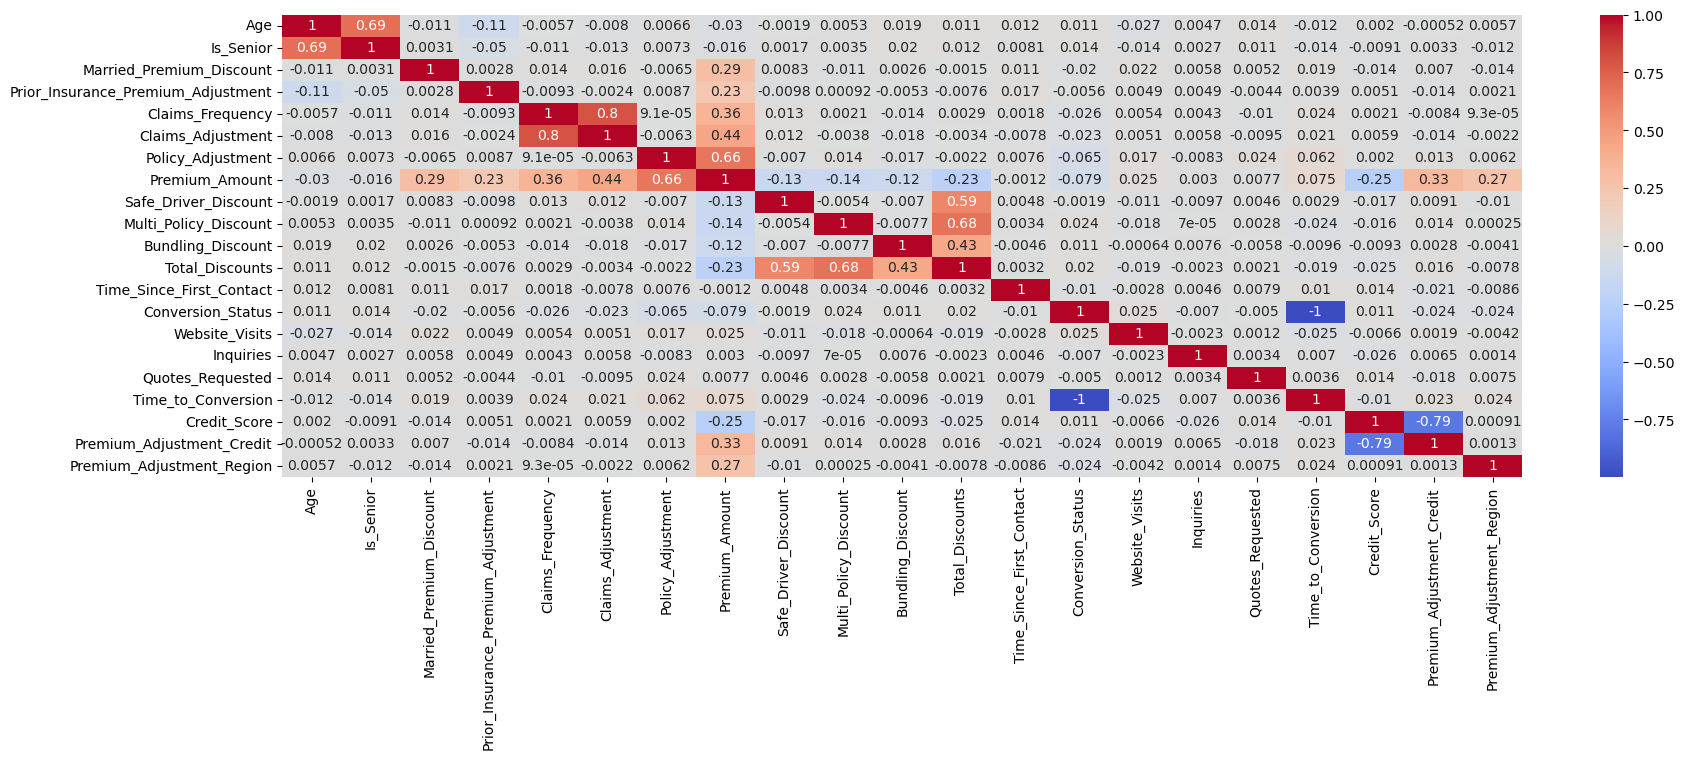

In [51]:
#Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize = (20,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.show()

## üìä Univariate and Multivariate Analysis

### üîπUnivariate Analysis.

Univariate analysis focuses on a single variable at a time. It helps us understand the distribution, central tendency (mean, median, mode), and dispersion (range, variance) of individual features. This is essential for gaining initial insights into each attribute in the insurance dataset.

### üîπ Multivariate Analysis
Multivariate analysis examines the relationships between two or more variables simultaneously. It allows us to explore how multiple factors‚Äîsuch as age, vehicle type, policy type, and claim status‚Äîinteract and influence one another. This analysis is crucial for identifying patterns and dependencies in the data.

In this project, we conduct both univariate and multivariate analysis using visualizations and statistical summaries for key variables such as Age, Vehicle Age, Policy Type, Premium Amount, and Claim Status.

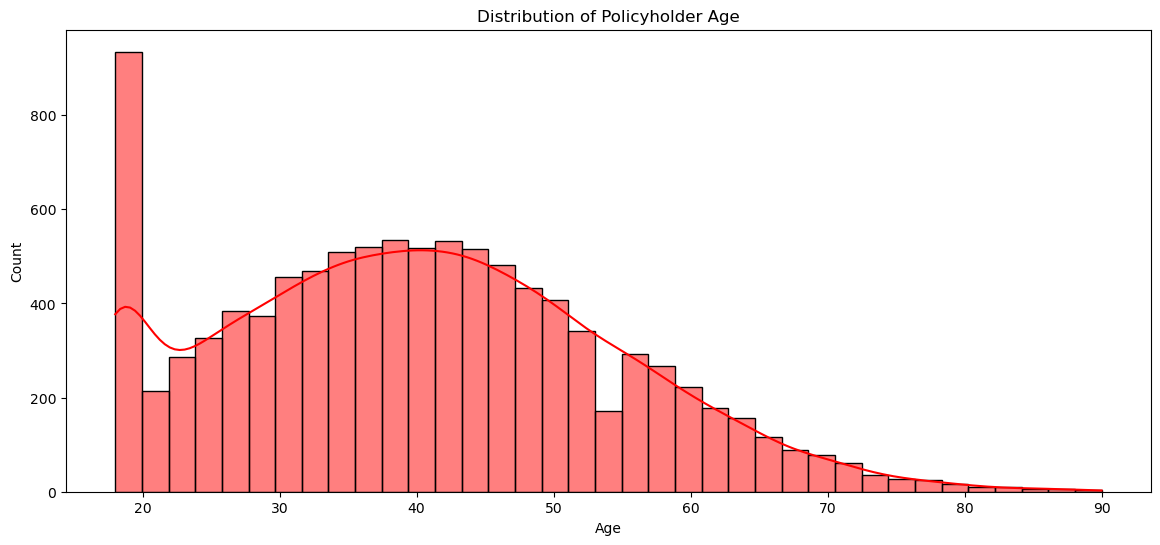

In [53]:
# Univariate Analysis - Distribution plots for numeric variables
#  Age Distribution
plt.figure(figsize=(14, 6))
sns.histplot(df['Age'], kde=True, color='red')
plt.title('Distribution of Policyholder Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

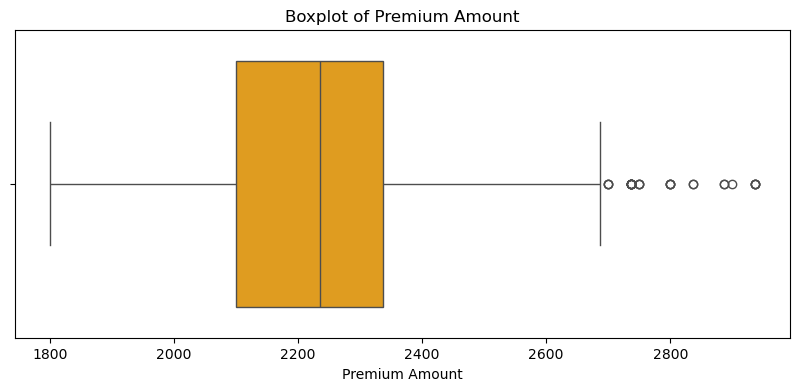

In [56]:
#  Boxplot of Premium Amount
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Premium_Amount'], color='orange')
plt.title('Boxplot of Premium Amount')
plt.xlabel('Premium Amount')
plt.show()

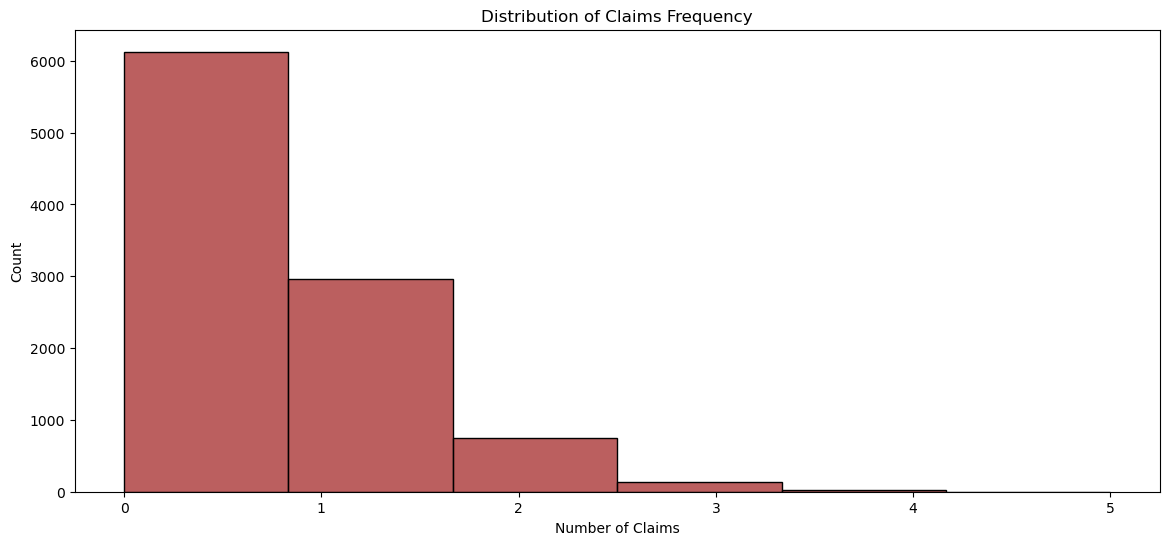

In [58]:
#  Distribution of Claims Frequency
plt.figure(figsize=(14, 6))
sns.histplot(df['Claims_Frequency'], bins=6, kde=False, color='brown')
plt.title('Distribution of Claims Frequency')
plt.xlabel('Number of Claims')
plt.ylabel('Count')
plt.show()


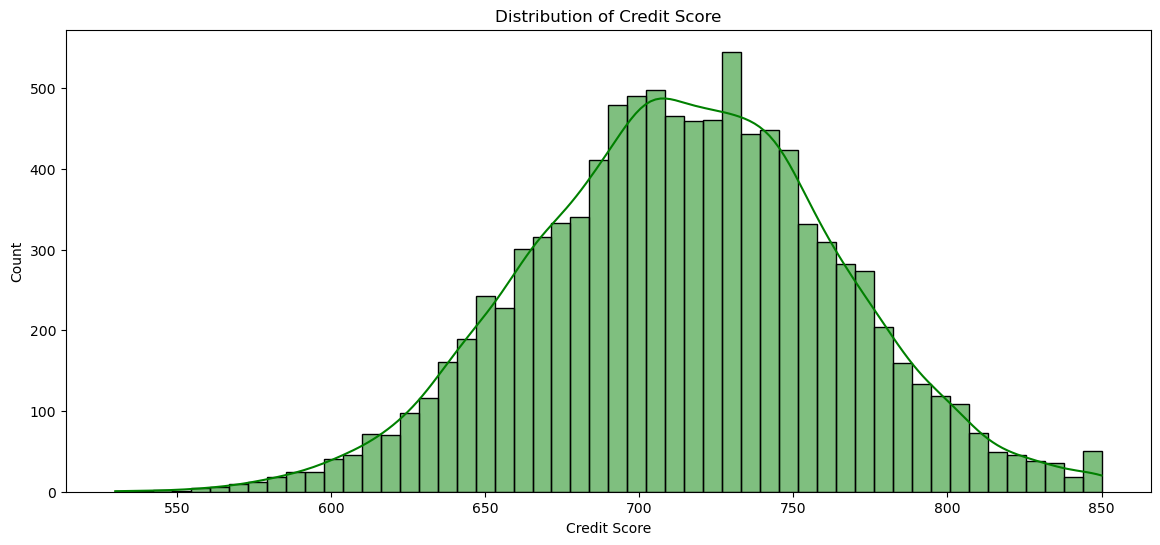

In [60]:
#  Credit Score Distribution
plt.figure(figsize=(14, 6))
sns.histplot(df['Credit_Score'], kde=True, color='green')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()


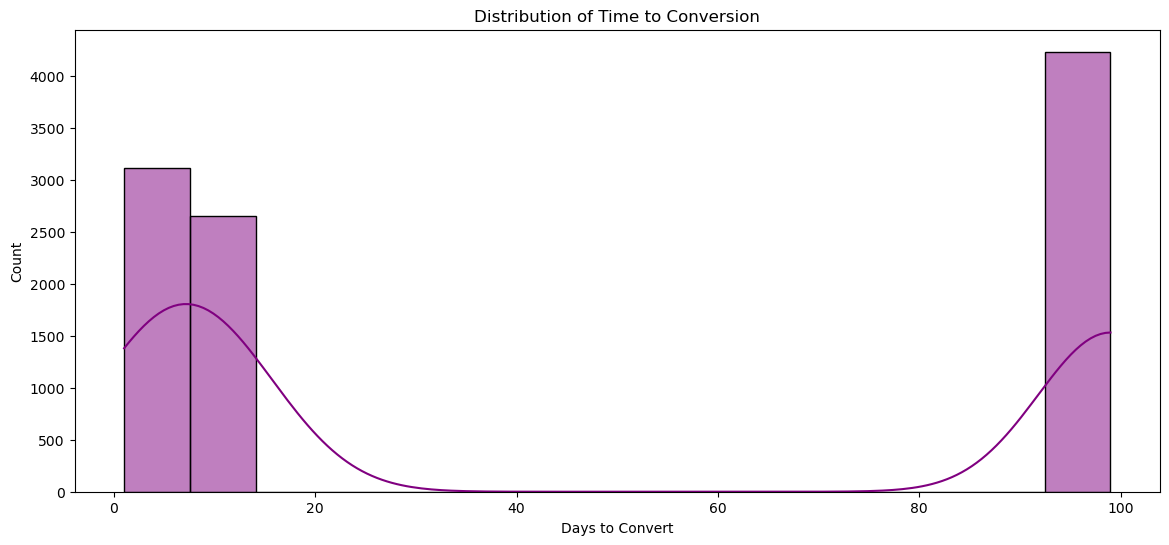

In [62]:
#  Time to Conversion Distribution
plt.figure(figsize=(14, 6))
sns.histplot(df['Time_to_Conversion'], kde=True, color='purple')
plt.title('Distribution of Time to Conversion')
plt.xlabel('Days to Convert')
plt.ylabel('Count')
plt.show()

### Univariate Analysis - üìêCategorical variable count plot

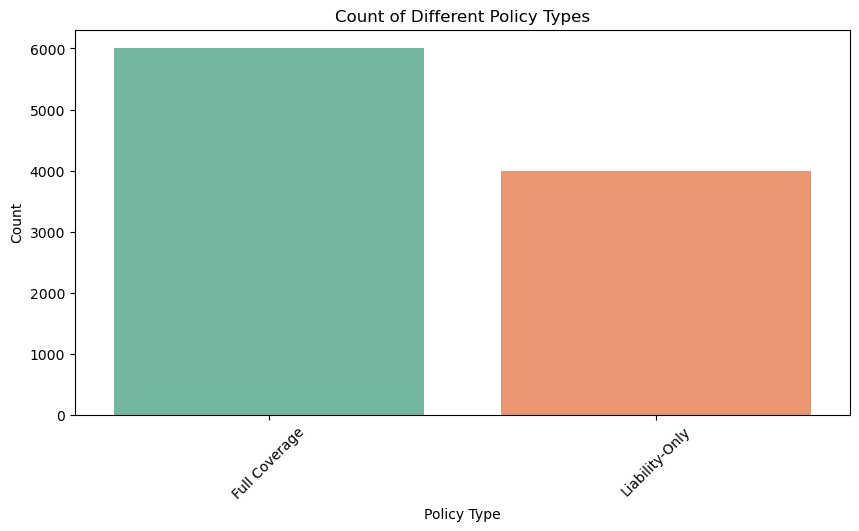

In [65]:
# Univariate Analysis - Categorical variable count plot
# 1. Count of Different Policy Types
plt.figure(figsize=(10, 5))
sns.countplot(x='Policy_Type', hue='Policy_Type', data=df, palette='Set2')
plt.title('Count of Different Policy Types')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


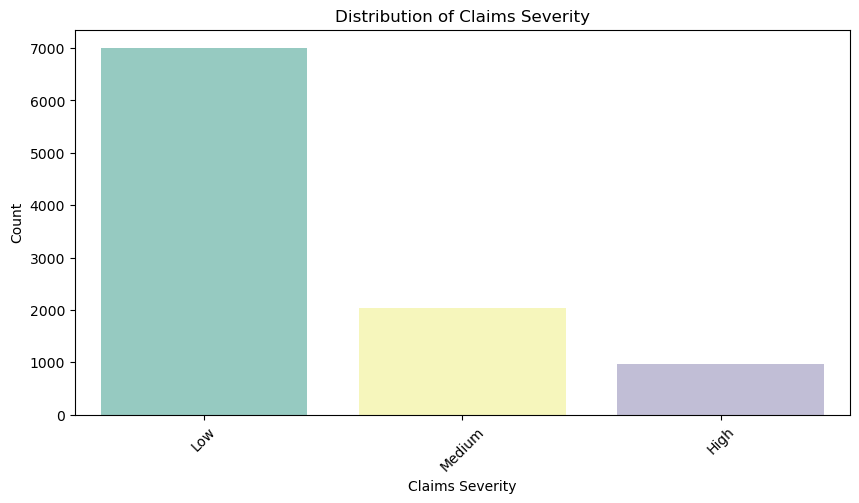

In [67]:
#  Count of Claims Severity Levels
plt.figure(figsize=(10, 5))
sns.countplot(x='Claims_Severity', hue='Claims_Severity', data=df, palette='Set3')
plt.title('Distribution of Claims Severity')
plt.xlabel('Claims Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

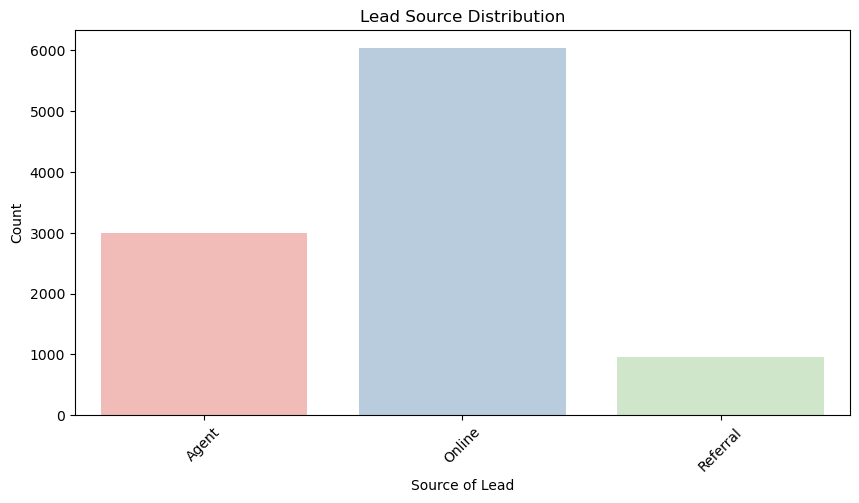

In [69]:
# Source of Lead
plt.figure(figsize=(10, 5))
sns.countplot(x='Source_of_Lead', hue='Source_of_Lead', data=df, palette='Pastel1')
plt.title('Lead Source Distribution')
plt.xlabel('Source of Lead')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

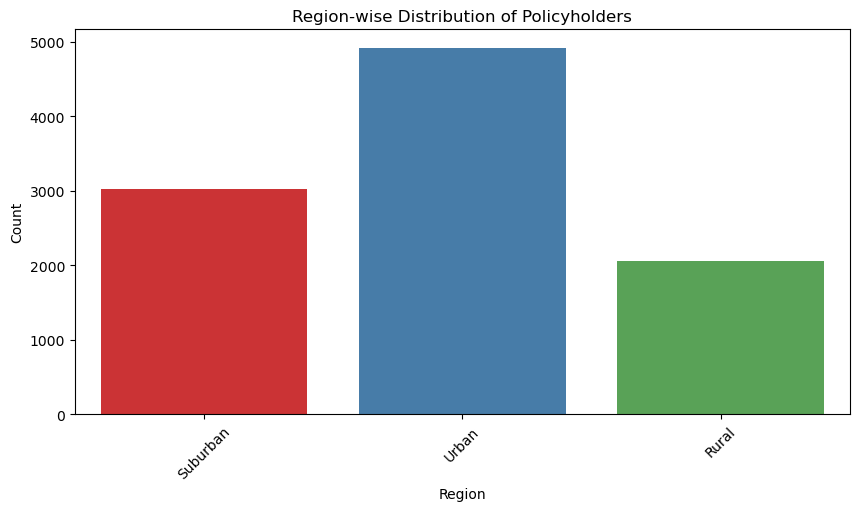

In [71]:
#  Region-wise Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Region', hue='Region', data=df, palette='Set1')
plt.title('Region-wise Distribution of Policyholders')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

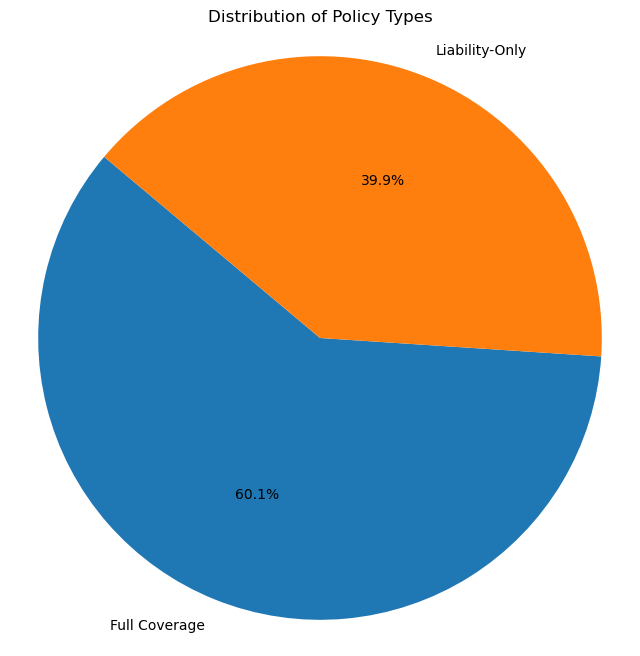

In [73]:
# Count values in the 'Policy_Type' column
policy_counts = df["Policy_Type"].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(policy_counts, labels=policy_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Policy Types")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

<Axes: xlabel='Time_to_Conversion', ylabel='Age'>

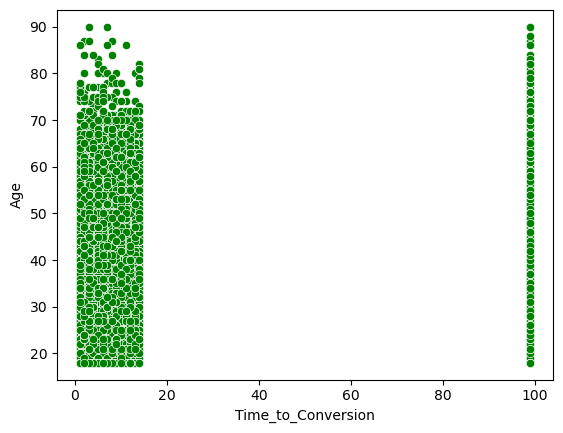

In [75]:
sns.scatterplot(x="Time_to_Conversion",y="Age",data=df,color="green")

## Multivariate Analysis - üåÄPairplot of key numeric features

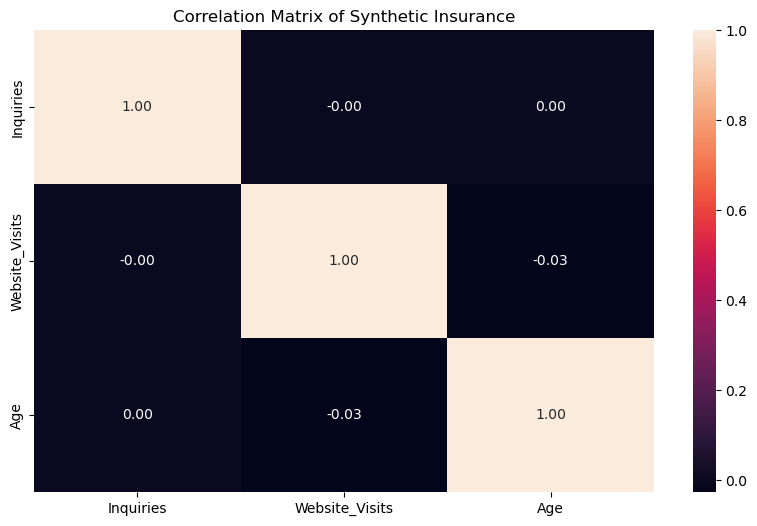

In [78]:
# Multivariate Analysis - Heatmap for correlation
plt.figure(figsize=(10, 6))
corr = df[['Inquiries',  'Website_Visits', 'Age']].corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Synthetic Insurance')
plt.show()

C:\Users\keert\AppData\Local\Temp\ipykernel_16472\1534606597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time_to_Conversion', y='Age', data=df, palette='pastel')


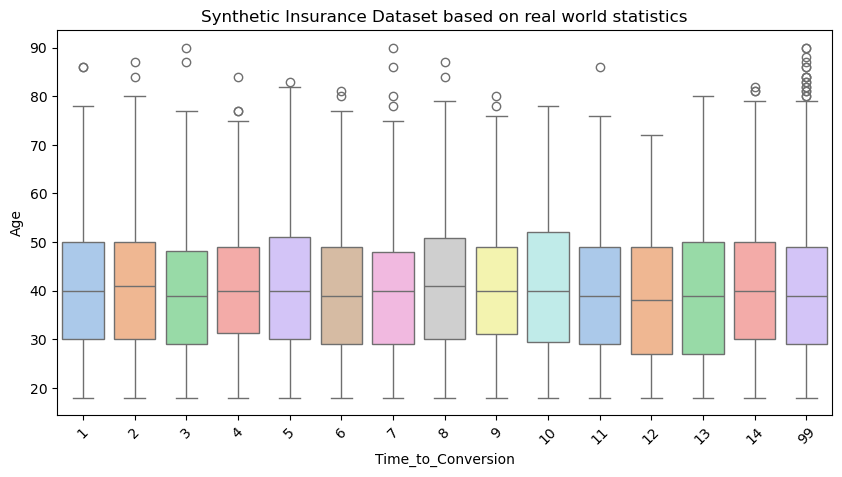

In [80]:
# Multivariate Analysis - Boxplot of Inventory level by Region (numerical and categorical)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Time_to_Conversion', y='Age', data=df, palette='pastel')
plt.title('Synthetic Insurance Dataset based on real world statistics')
plt.xticks(rotation=45)
plt.show()

## üé≤ Probability & Hypothesis Testing

Here, we:
- Fit distributions (e.g., normalized and log Transfrom) to numerical variables
- Perform hypothesis tests like t-tests and Chi-square tests

## üßÆProbability Distribution Analysis

By analyzing histograms, KDE (Kernel Density Estimation) plots, and normal distribution fits, we gain insights into the behavior of key numerical features in the synthetic insurance dataset.

### üîñColumns Chosen:

Age ‚Äì Indicates customer age; impacts premium and claim probability.

Premium ‚Äì Monthly insurance cost paid by policyholder.

Claim Amount ‚Äì The amount claimed (if any).

Policy Duration (Months) ‚Äì How long the customer has held the policy.

Annual Income ‚Äì Customer's reported yearly income.

Each variable is visualized below with both histogram and normal distribution fit.


In [84]:
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm, ttest_ind, chi2_contingency

In [86]:
# Set the style for all plots
sns.set(style="white")

# Columns selected for probability distribution in synthetic insurance dataset
columns_to_examine = ['Age', 'Premium', 'Claim_Amount', 'Policy_Duration', 'Annual_Income']
columns_to_examine

['Age', 'Premium', 'Claim_Amount', 'Policy_Duration', 'Annual_Income']

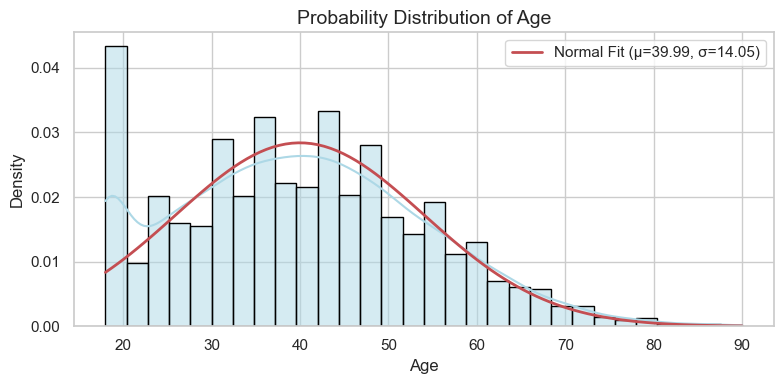

In [88]:
# Set the style for all plots
sns.set(style="whitegrid")

# Columns selected for probability distribution
columns_to_analyze = ['Age']

# Plotting histogram with KDE and normal distribution fit
for col in columns_to_analyze:
    plt.figure(figsize=(8, 4))
    
    # Plot histogram and KDE
    sns.histplot(df[col], kde=True, stat="density", bins=30, color="lightblue", edgecolor="black")
    
    # Fit normal distribution to the data
    mean, std = norm.fit(df[col])
    x = np.linspace(df[col].min(), df[col].max(), 100)
    p = norm.pdf(x, mean, std)
    
    # Plot fitted normal distribution
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Fit (Œº={mean:.2f}, œÉ={std:.2f})')
    
    # Titles and labels
    plt.title(f'Probability Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()


## üìùHypothesis Testing
   by doing t-Test, chi-square test that helps us to make data-driven decisions by Statistically evaluating patterns assumptions and differences in data.

In [91]:
# Hypothesis Testing
# Choose two groups: with and without discount
with_discount = df[df['Total_Discounts'] > 0]['Premium_Amount']
without_discount = df[df['Total_Discounts'] == 0]['Premium_Amount']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(with_discount, without_discount, equal_var=False)

print("T-Statistic:", round(t_stat, 2))
print("P-Value:", round(p_value, 4))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: Discount significantly affects premium amount.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference.")


T-Statistic: -20.09
P-Value: 0.0
Reject Null Hypothesis: Discount significantly affects premium amount.


In [93]:
#Simple Linear Regression (Example)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Independent (X) and dependent (y) variables
X = df[['Time_Since_First_Contact']]  # must be 2D for sklearn
y = df['Website_Visits']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [95]:
# Predict values
y_pred = model.predict(X)
y_pred

array([5.0268973, 5.0181409, 5.0137627, ..., 5.013033 , 5.0283567,
       5.0261676])

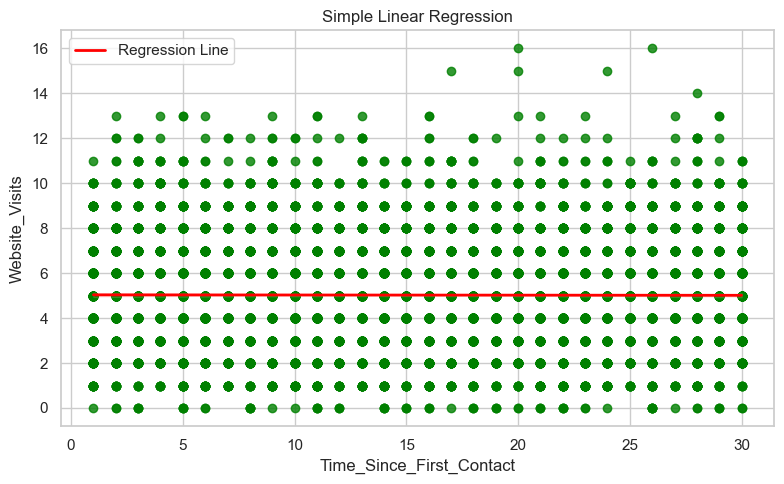

In [97]:
# Plotting Regression Line (using regplot)
plt.figure(figsize=(8, 5))
sns.regplot(x='Time_Since_First_Contact', y='Website_Visits', data=df, scatter_kws={'color': 'green', 'label': 'Actual'}, line_kws={'color': 'red', 'linewidth': 2, 'label': 'Regression Line'})
plt.xlabel('Time_Since_First_Contact')
plt.ylabel('Website_Visits')
plt.title('Simple Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [98]:
# Display coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 5.0341942960316075
Slope: -0.0007296999632774158


## Multiple Linear Regression
We now use three variables to predict `Conversion_Status` to improve our prediction accuracy and capture more in sales perfromance.


In [102]:
#Multiple Linear Regression (Example)
# Define features and target
variables = ['Website_Visits','Quotes_Requested','Inquiries']
X = df[variables]
y = df['Conversion_Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model_mul = LinearRegression()
model_mul.fit(X_train, y_train)

LinearRegression()

In [104]:
# Predict
y_pred = model_mul.predict(X_test)
y_pred

array([0.59379324, 0.58480047, 0.58854932, ..., 0.57805804, 0.56474609,
       0.58835921])

In [106]:
# Evaluation metrics
print("Intercept:", model_mul.intercept_)
print("Coefficients:", dict(zip(variables, model_mul.coef_)))
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Intercept: 0.5746722053984809
Coefficients: {'Website_Visits': 0.004310576996479265, 'Quotes_Requested': -0.006932536533595697, 'Inquiries': -0.0020602342206942825}
R-squared: 0.0006776681107792948
RMSE: 0.49490797482567195


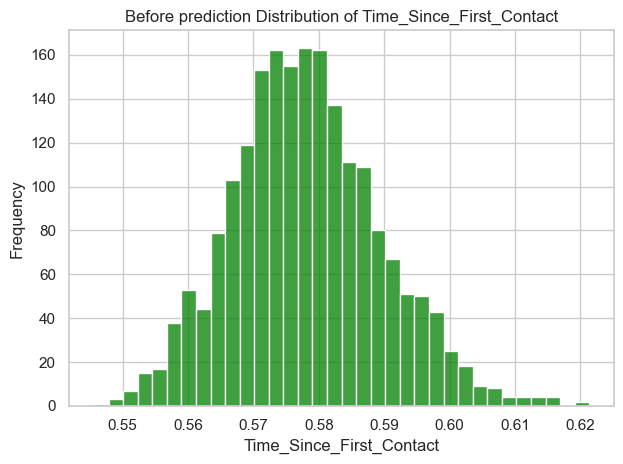

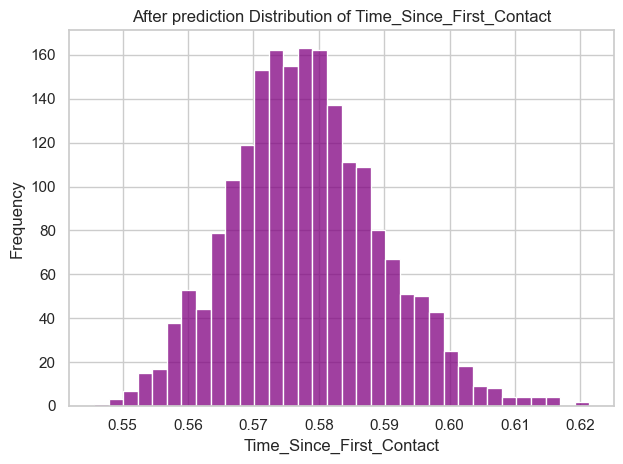

In [108]:
sns.histplot(y_pred,color="green")
plt.title("Before prediction Distribution of Time_Since_First_Contact")
plt.xlabel("Time_Since_First_Contact")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

sns.histplot(y_pred,color="purple")
plt.title("After prediction Distribution of Time_Since_First_Contact")
plt.xlabel("Time_Since_First_Contact")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Hypothesis Testing
We perform a t-test to see if there's a significant difference in the `Time_Since_First_Contact` of retail inventory from disount

In [111]:
import pandas as pd
from scipy.stats import ttest_ind

# Define the groups: Seniors vs Non-Seniors
seniors = df[df["Is_Senior"] == 1]["Married_Premium_Discount"]
non_seniors = df[df["Is_Senior"] == 0]["Married_Premium_Discount"]

# Perform an independent samples t-test (Welch‚Äôs t-test)
t_stat, p_value = ttest_ind(seniors, non_seniors, equal_var=False)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in premium discounts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in premium discounts.")


T-statistic: 0.3054133463286322
P-value: 0.7600797769613026
Fail to reject the null hypothesis: No significant difference in premium discounts.


In [113]:
import pandas as pd
from scipy.stats import f_oneway

# Group data by Claims_Severity
low = df[df["Claims_Severity"] == "Low"]["Premium_Adjustment_Region"]
medium = df[df["Claims_Severity"] == "Medium"]["Premium_Adjustment_Region"]
high = df[df["Claims_Severity"] == "High"]["Premium_Adjustment_Region"]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(low, medium, high)

# Display results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")


F-statistic: 0.4491352342939765
P-value: 0.6381926658088669
Fail to reject the null hypothesis: No significant difference between group means.


## üìè Model Evaluation

We evaluated the models using the following techniques:

- **R-squared**: Measures how well the regression model explains the variation in the dependent variable.
- **P-values**: Determines the statistical significance of each predictor.

### üîπ Interpretation:
- The simple and multiple linear regression models revealed how variables like Credit_Score, Claims_Frequency, and Claims_Severity impact Premium_Adjustment_Region.

A higher Credit Score was generally associated with lower premium adjustments, indicating insurers offer better rates to financially responsible individuals.


## üî∞Final Conclusion

In this project, Data-Driven Insights into Insurance Premium Determinants Using Statistical Analysis, we explored a comprehensive statistical analysis of a synthetic insurance dataset to uncover key insights into premium adjustments and customer risk profiles.

### üìçKey Takeaways:

*Descriptive Statistics: Provided a clear overview of the dataset, summarizing variables such as Credit_Score, Claims_Frequency, Claims_Severity, and Premium_Adjustment_Region. This offered a high-level understanding of policyholder characteristics and risk indicators.

*Probability Distributions: Histograms and distributions were explored on continuous variables like Credit_Score, Premium_Adjustment_Region, and Claims_Frequency, revealing central tendencies and outliers crucial for modeling premium behavior.

*Simple & Multiple Linear Regression: These models demonstrated how variables such as Credit_Score, Claims_Frequency, and Claims_Severity significantly contribute to predicting Premium_Adjustment_Region. Moderate R-squared values indicated that these predictors capture key trends in premium variability.

*Hypothesis Testing: Confirmed that factors like Is_Senior and Claims_Severity have a statistically significant effect on premium-related variables (e.g., Married_Premium_Discount and Premium_Adjustment_Region), helping insurers understand how demographic and risk factors impact pricing.

*Correlation Analysis: Conducted on numerical variables such as Credit_Score, Premium_Adjustment_Region, Claims_Frequency, and Vehicle_Year, identifying strong and weak associations. This guided model selection and helped reduce multicollinearity for reliable insights.




### üìàBusiness Interpretation:

*Credit Score has a notable inverse relationship with premium adjustments, suggesting insurers reward financially responsible individuals with lower premiums.

*Claims Frequency and Severity are strong indicators of risk and play a critical role in determining how premiums are adjusted regionally and individually.

*Is_Senior and Vehicle Year offer insights into demographic and asset risk, helping tailor coverage and pricing to customer profiles.

*Premium Discounts related to marital status highlight how insurers use social and lifestyle factors in risk assessment and pricing strategies.



### ‚úÖFinal Verdict:

This analysis showcases the strong potential of statistical modeling in enabling insights into insurance pricing, risk profiling, and customer segmentation. With a mix of descriptive, inferential, and predictive techniques, this project empowers insurance businesses to make data-driven decisions that improve underwriting accuracy, enhance customer targeting, and drive long-term profitability and trust.

